

# <strong><p style="text-align: center;">Time Series Coursework</p></strong>


# <bold><p style="text-align: center;">Ionut Catalin Nodis</p></bold>

---

## **Introduction**
This notebook presents an analysis of the relationship between **Google Trends searches for "unemployment"** and the **number of people filing for unemployment claims**. The goal is to explore the time series properties of these variables, estimate a suitable ARMA model, and assess the dynamic impact of Google search trends on unemployment claims.

The analysis follows the structure outlined in the coursework brief.

---

## **📌 Table of Contents**
Click on any section below to navigate directly.

### **Part 1: ARMA Model for Unemployment Claims**
1. [Stationarity Tests (ADF & KPSS)](#stationarity-tests)
2. [ARMA Model Selection](#arma-model-selection)
3. [ARMA Model Estimation & Interpretation](#arma-estimation)

### **Part 2: Dynamic Response Analysis (ADL Model)**
4. [Distributed Lag Model Setup](#adl-model-setup)
5. [ADL Model Estimation](#adl-estimation)
6. [Dynamic Response Interpretation](#adl-interpretation)

### **Part 3: Structural Break Analysis**
7. [Chow Test for 2009](#chow-test)
8. [CUSUM Test](#cusum-test)
9. [Markov Switching Model](#markov-switching-model)
10. [Bai-Perron Multiple Breakpoint Test](#bai-perron-test)


---

## **Data Description**
- **Time Period**: January 2004 – February 2020 (monthly frequency).
- **Variable 1** $(y_t)$: The number of people who filed for **unemployment**.
- **Variable 2** $(x_t)$: The number of **Google searches** for the term **"unemployment"**.
- **Transformations**:
  - The data has been **log-transformed**.
  - **Seasonal factors have been removed**.

---

## **Analysis Workflow**
### **1️⃣ Check for Stationarity**
- Assess whether the two time series are **covariance-stationary**.
- If non-stationary, apply **differencing** to achieve stationarity.

### **2️⃣ Model Selection for $y_t$**
- Identify the **best ARMA$(p, q )$ model** for **unemployment claims**.
- Consider models with **$(p, q \leq 10 )$** (maximum lag length of 10).
- Use **AIC, BIC, and HQIC** to determine the most appropriate model.

### **3️⃣ ARMA Model Estimation**
- Estimate the selected **ARMA model** for **($y_t$)**.
- Analyze the **parameter estimates** and evaluate their significance.

### **4️⃣ Dynamic Response Analysis (ADL Model)**
- Use an **Autoregressive Distributed Lag (ADL) model** to measure the impact of **Google Trends searches $(x_t$) on unemployment claims ($y_t$)**.
- Forecast the **dynamic response up to 3 months ahead**.
- Consider:
  - **Appropriate number of lags** of ($x_t$).
  - **Robust standard errors (HAC)** to correct for heteroskedasticity and autocorrelation.
  - **Interpretation of coefficients** to understand how Google searches influence unemployment claims over time.

---

## **Objective**
This analysis aims to determine:
- Whether Google search trends can **predict** unemployment claims.
- The **best-fitting ARMA model** for unemployment claims.
- The **short-term vs. long-term impact** of Google search trends on unemployment.
---

[dynamicResponseAnalysis]: #dynamic-response-analysis

## **Question to Answer**
> **Did the relationship between Google searches and unemployment filings change after the financial crisis, assuming it ended in 2009?**  
> **Is there any other evidence of a structural break in the sample?**

To address this question, we will:
- Perform a **Chow test** to detect potential structural breaks in the relationship between **Google Trends searches** and **unemployment claims**.
- Estimate **separate pre-2009 and post-2009 regression models** to compare coefficients.
- Analyze whether the **predictive power of Google searches** for unemployment claims changed after the financial crisis.
- Check for **additional breakpoints** using statistical tests.

---

In [ ]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from statsmodels.tsa.stattools import adfuller, kpss, arma_order_select_ic
import statsmodels.api as sm
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression
import statsmodels.tsa.stattools as ts



In [3]:
#Import the data 

file_path = '/Users/nodisionut/Desktop/PYTHON WORKHOURSE/TIME SERIES/Coursework/courseworkdata_2425.csv'
data = pd.read_csv(file_path)

#Set data type to datetime and set index to date
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

#Check the data
print(data.head(20))  #print the first 20 rows of the data

            GoogleUnemployment  InitialUnemploymentClaims
Date                                                     
2004-01-01            1.928881                  12.701032
2004-02-01            1.928881                  12.701032
2004-03-01            1.928881                  12.691883
2004-04-01            1.861956                  12.711496
2004-05-01            1.928903                  12.697316
2004-06-01            1.960750                  12.725278
2004-07-01            1.976603                  12.710076
2004-08-01            1.984413                  12.707224
2004-09-01            1.987884                  12.702983
2004-10-01            1.988883                  12.700596
2004-11-01            1.988409                  12.694817
2004-12-01            1.987022                  12.694481
2005-01-01            1.985047                  12.740963
2005-02-01            1.982678                  12.663763
2005-03-01            1.980034                  12.725801
2005-04-01    

# **<a id='stationarity-tests'></a> Stationarity Tests (ADF & KPSS)**

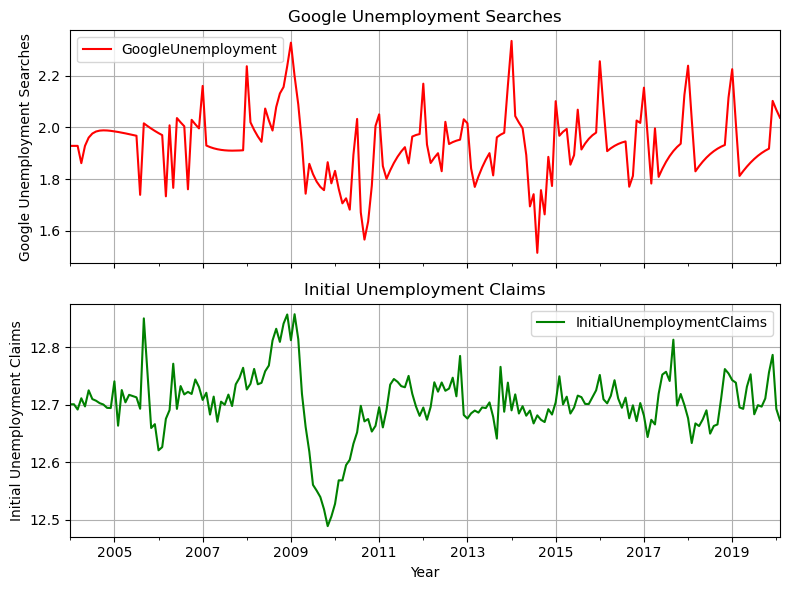

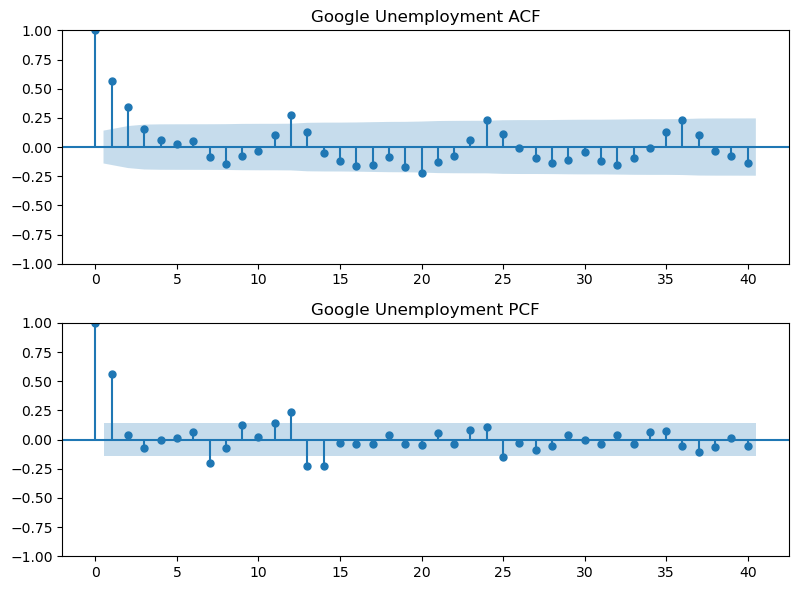

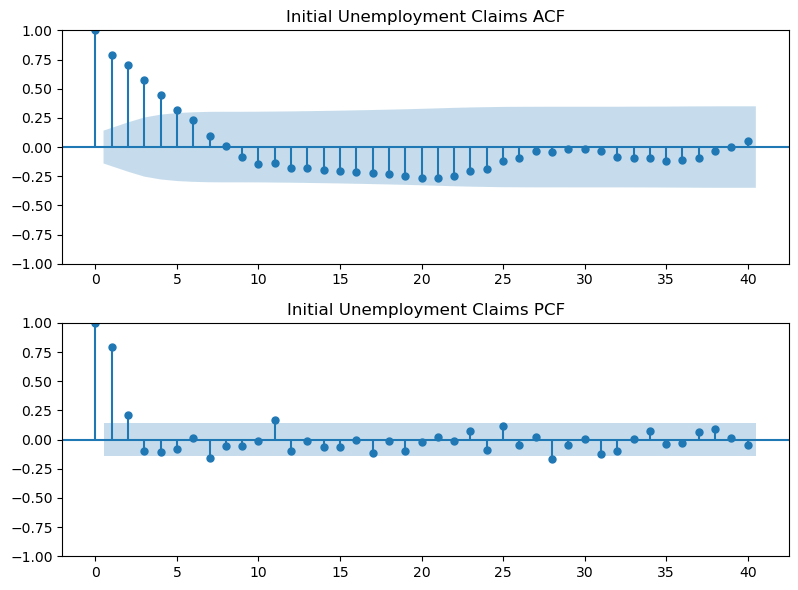

Google Unemployment Searches t-distribution parameters: (4.4240698673580106, 1.9334999074998622, 0.09894665566205077)
Initial Unemployment Claims t-distribution parameters: (2.2280498714161476, 12.704254800206787, 0.03108293777706502)


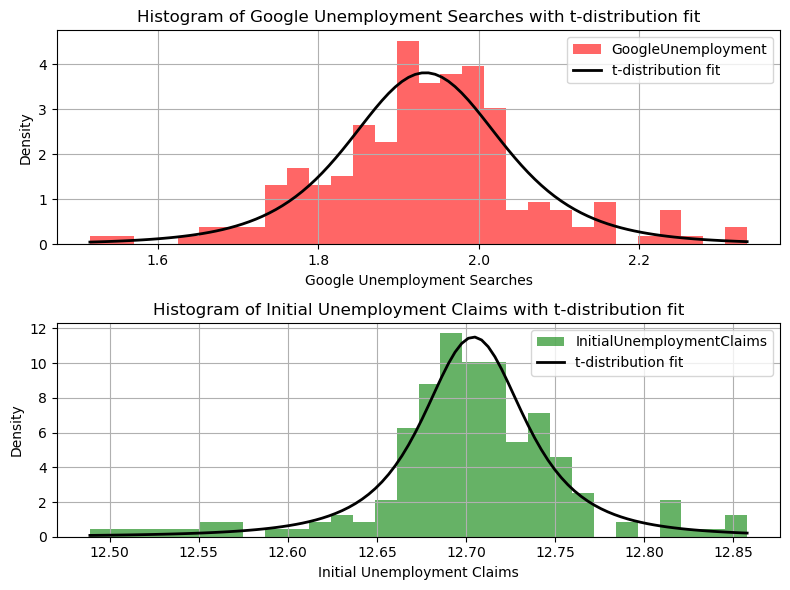

In [4]:
from scipy.stats import t

# Plot the data and check the ACF and PCF 
fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

data['GoogleUnemployment'].plot(ax=ax[0], color='r', title='Google Unemployment Searches', legend=True)
ax[0].set_ylabel('Google Unemployment Searches')
ax[0].grid(True)

data['InitialUnemploymentClaims'].plot(ax=ax[1], color='g', title='Initial Unemployment Claims', legend=True)
ax[1].set_ylabel('Initial Unemployment Claims')
ax[1].grid(True)

plt.xlabel('Year')
plt.tight_layout()
plt.show()

# Check the ACF and PCF for GoogleUnemployment
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
plot_acf(data['GoogleUnemployment'], lags=40, ax=ax[0], title='Google Unemployment ACF')
plot_pacf(data['GoogleUnemployment'], lags=40, ax=ax[1], title='Google Unemployment PCF')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 1, figsize=(8, 6))
plot_acf(data['InitialUnemploymentClaims'], lags=40, ax=ax[0], title='Initial Unemployment Claims ACF')
plot_pacf(data['InitialUnemploymentClaims'], lags=40, ax=ax[1], title='Initial Unemployment Claims PCF')
plt.tight_layout()
plt.show()

# Fit a t-distribution to the data
google_unemployment_params = t.fit(data['GoogleUnemployment'])
initial_unemployment_claims_params = t.fit(data['InitialUnemploymentClaims'])

# Print the parameters of the fitted t-distributions
print(f"Google Unemployment Searches t-distribution parameters: {google_unemployment_params}")
print(f"Initial Unemployment Claims t-distribution parameters: {initial_unemployment_claims_params}")

# Plot the histograms with the fitted t-distributions
fig, ax = plt.subplots(2, 1, figsize=(8, 6))

# Google Unemployment Searches
data['GoogleUnemployment'].plot(kind='hist', bins=30, density=True, ax=ax[0], color='r', alpha=0.6, title='Histogram of Google Unemployment Searches with t-distribution fit')
x = np.linspace(data['GoogleUnemployment'].min(), data['GoogleUnemployment'].max(), 100)
ax[0].plot(x, t.pdf(x, *google_unemployment_params), 'k-', lw=2, label='t-distribution fit')
ax[0].set_xlabel('Google Unemployment Searches')
ax[0].set_ylabel('Density')
ax[0].legend()
ax[0].grid(True)

# Initial Unemployment Claims
data['InitialUnemploymentClaims'].plot(kind='hist', bins=30, density=True, ax=ax[1], color='g', alpha=0.6, title='Histogram of Initial Unemployment Claims with t-distribution fit')
x = np.linspace(data['InitialUnemploymentClaims'].min(), data['InitialUnemploymentClaims'].max(), 100)
ax[1].plot(x, t.pdf(x, *initial_unemployment_claims_params), 'k-', lw=2, label='t-distribution fit')
ax[1].set_xlabel('Initial Unemployment Claims')
ax[1].set_ylabel('Density')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

# Interpretation of ADF and KPSS Tests for Stationarity

### **Augmented Dickey-Fuller (ADF) Test:**
- **Null Hypothesis (H0):** The time series has a unit root (i.e., it is non-stationary).
- **Alternative Hypothesis (H1):** The time series is stationary.
- **Interpretation:**
  - A **p-value < 0.05** indicates we **reject the null hypothesis**, suggesting the series is **stationary**.
  - A **p-value ≥ 0.05** means we **fail to reject the null**, indicating **non-stationarity**.

### **KPSS (Kwiatkowski–Phillips–Schmidt–Shin) Test:**
- **Null Hypothesis (H0):** The time series is stationary.
- **Alternative Hypothesis (H1):** The time series has a unit root (i.e., it is non-stationary).
- **Interpretation:**
  - A **p-value ≥ 0.05** means we **fail to reject the null**, indicating the series is **stationary**.
  - A **p-value < 0.05** indicates we **reject the null**, suggesting **non-stationarity**.

### **Combining ADF and KPSS Results:**
- If **ADF** rejects H0 (stationary) and **KPSS** fails to reject H0 (stationary), the series is **stationary**.
- If **ADF** fails to reject H0 (non-stationary) and **KPSS** rejects H0 (non-stationary), the series is **non-stationary**.


In [5]:
# Check for stationarity using ADF and KPSS tests

def test_stationarity(series, window=12):
    """
    Test the stationarity of a time series using the Augmented Dickey-Fuller test and Kwiatkowski-Phillips-Schmidt-Shin test.
    
    Parameters
    ----------
    series : pandas.Series
        The time series to test for stationarity.
    window : int
        The window size to use for the KPSS test.
    
    Returns
    -------
    adf : float
        The p-value from the Augmented Dickey-Fuller test.
    kpss : float
        The p-value from the Kwiatkowski-Phillips-Schmidt-Shin test.
    """
    adf = adfuller(series)[1]
    kpss_test = kpss(series, regression='c', nlags='auto')[1]
    return adf, kpss_test

# Print the p-values for the ADF and KPSS tests for both columns
google_unemployment_adf, google_unemployment_kpss = test_stationarity(data["GoogleUnemployment"])
initial_unemployment_claims_adf, initial_unemployment_claims_kpss = test_stationarity(data["InitialUnemploymentClaims"])

# Define critical values for ADF and KPSS tests
adf_critical_value = 0.05
kpss_critical_value = 0.05

# Compare p-values with critical values and print results
def interpret_stationarity(adf_pvalue, kpss_pvalue, variable_name):
    adf_result = "not stationary" if adf_pvalue > adf_critical_value else "stationary"
    kpss_result = "not stationary" if kpss_pvalue < kpss_critical_value else "stationary"
    print(f'The {variable_name} series is {adf_result} based on the ADF test (p-value: {adf_pvalue:.4f})')
    print(f'The {variable_name} series is {kpss_result} based on the KPSS test (p-value: {kpss_pvalue:.4f})')

interpret_stationarity(google_unemployment_adf, google_unemployment_kpss, "GoogleUnemployment")
interpret_stationarity(initial_unemployment_claims_adf, initial_unemployment_claims_kpss, "InitialUnemploymentClaims")




The GoogleUnemployment series is stationary based on the ADF test (p-value: 0.0040)
The GoogleUnemployment series is stationary based on the KPSS test (p-value: 0.1000)
The InitialUnemploymentClaims series is stationary based on the ADF test (p-value: 0.0003)
The InitialUnemploymentClaims series is stationary based on the KPSS test (p-value: 0.1000)


/var/folders/6p/w656sb2s0hz7rlnsgzxx4yyc0000gn/T/ipykernel_65537/1320755207.py:22: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression='c', nlags='auto')[1]
/var/folders/6p/w656sb2s0hz7rlnsgzxx4yyc0000gn/T/ipykernel_65537/1320755207.py:22: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(series, regression='c', nlags='auto')[1]


### GoogleUnemployment Series:
- **ADF p-value = 0.0040** (less than 0.05): Reject H₀. Conclusion: Stationary.
- **KPSS p-value = 0.1000** (greater than 0.05): Fail to reject H₀. Conclusion: Stationary.
- Both tests agree: the GoogleUnemployment series appears stationary.

### InitialUnemploymentClaims Series:
- **ADF p-value = 0.0003** (less than 0.05): Reject H₀. Conclusion: Stationary.
- **KPSS p-value = 0.1000** (greater than 0.05): Fail to reject H₀. Conclusion: Stationary.
- Both tests agree: the InitialUnemploymentClaims series appears stationary.

## Raising the error

> InterpolationWarning: The test statistic is outside of the range of p-values available in the look-up table. The actual p-value is greater than the p-value returned.

## Explanation
This warning comes from the KPSS test and indicates that the test statistic computed from the data is so low that it’s not included in the pre-computed lookup table used internally by the KPSS implementation.

The KPSS statistic is very clearly in the stationary region, so the reported p-value (0.1000) is actually conservative. In reality, the actual p-value is likely higher than 0.1 (thus making the test even more strongly suggest stationarity).



In [6]:
#Define x and y variables 

xt = data['GoogleUnemployment']
yt = data['InitialUnemploymentClaims']

## **<a id='arma-model-selection'></a> Part 1: ARMA Model for Unemployment Claims**
This section explores the time series properties of **unemployment claims** and identifies the best **ARMA model** for forecasting.


## Selecting Lags using Information Criteria 

In [7]:
#----------------------------------------------------------
#Information criteria for lag selection for ARIMA model 
#----------------------------------------------------------
# Define the maximum number of lags to consider
max_lags = 10

# Function to find the best ARIMA order using different information criteria
def find_best_arima_order(series, max_lags, criterion):
    model = pm.auto_arima(
        series,
        start_p=0, start_q=0,
        max_p=max_lags, max_q=max_lags,
        seasonal=False,
        stepwise=True,
        suppress_warnings=True,
        information_criterion=criterion
    )
    return model.order

# Find the best ARIMA order for yt using AIC, BIC, and HQIC
yt_orders = {
    'AIC': find_best_arima_order(yt, max_lags, 'aic'),
    'BIC': find_best_arima_order(yt, max_lags, 'bic'),
    'HQIC': find_best_arima_order(yt, max_lags, 'hqic')
}

# Print the selected ARIMA orders for yt
for criterion, order in yt_orders.items():
    print(f'Selected ARIMA order for yt using {criterion}: {order}')

# Find the best ARIMA order for xt using AIC, BIC, and HQIC
xt_orders = {
    'AIC': find_best_arima_order(xt, max_lags, 'aic'),
    'BIC': find_best_arima_order(xt, max_lags, 'bic'),
    'HQIC': find_best_arima_order(xt, max_lags, 'hqic')
}

# Print the selected ARIMA orders for xt
for criterion, order in xt_orders.items():
    print(f'Selected ARIMA order for xt using {criterion}: {order}')


Selected ARIMA order for yt using AIC: (4, 0, 0)
Selected ARIMA order for yt using BIC: (1, 0, 2)
Selected ARIMA order for yt using HQIC: (2, 0, 0)
Selected ARIMA order for xt using AIC: (1, 0, 0)
Selected ARIMA order for xt using BIC: (1, 0, 0)
Selected ARIMA order for xt using HQIC: (1, 0, 0)


* For $y_{t}$ we choose to estimate both AIC and HQIC with an ARIMA Order of (4, 0, 0) and (2, 0, 0)
* For $x_{t}$ all criteria suggest an ARIMA Order of (1, 0, 0)

# **<a id='arma-estimation'></a> ARMA Model Estimation & Interpretation**

# Assumption
Mathematically, an ARIMA(p,d,q) model is defined as:


$$\phi_p(B) (1 - B)^d y_t = \theta_q(B) \epsilon_t$$

where:
- $y_t$ is the time series.
- $B$ is the backward shift operator (i.e., $B y_t = y_{t-1}$).
- $\phi_p(B)$ represents the autoregressive (AR) polynomial of order $p$.
- $\theta_q(B)$ represents the moving average (MA) polynomial of order $q$.
- $d$ represents the degree of differencing to make the series stationary.
- $\epsilon_t$ is a white noise error term.

## When ARIMA Reduces to ARMA

If  $d = 0$ , the differencing term  $(1 - B)^d$  vanishes, and the model simplifies to:


$$\phi_p(B) y_t = \theta_q(B) \epsilon_t$$


which is exactly the form of an ARMA(p, q) model.
## Intuition
- ARIMA models are used when a time series is non-stationary and requires differencing to become stationary.
- ARMA models are used when the series is already stationary and does not require differencing.
- Setting $d = 0$ in an ARIMA model means no differencing is performed, making it equivalent to an ARMA model.

## Thus, we can conclude:


$$\text{ARMA}(p, q) = \text{ARIMA}(p, 0, q)$$



## Moving forward, we will estimate an ARIMA (p, 0, q) model

                                   SARIMAX Results                                   
Dep. Variable:     InitialUnemploymentClaims   No. Observations:                  194
Model:                        ARIMA(4, 0, 0)   Log Likelihood                 382.385
Date:                       Sat, 22 Feb 2025   AIC                           -752.770
Time:                               14:11:42   BIC                           -733.163
Sample:                           01-01-2004   HQIC                          -744.831
                                - 02-01-2020                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.7013      0.012   1026.137      0.000      12.677      12.726
ar.L1          0.6360      0.060     10.637      0.000       0.519       0.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Figure size 1000x600 with 0 Axes>

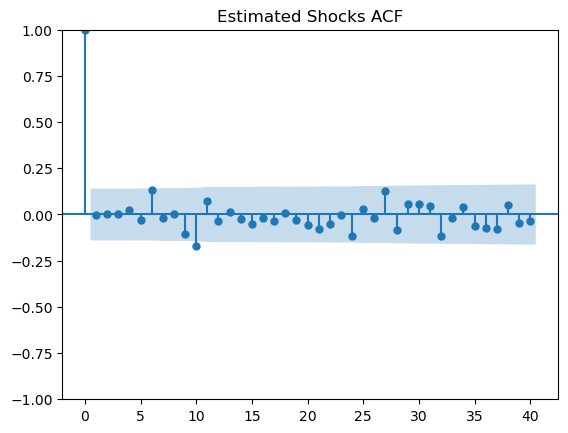

In [8]:
#ARIMA model for yt using AIC order
model_yt = ARIMA(yt, order=(4, 0, 0))
model_fit = model_yt.fit()

#Prin model summary 
print(model_fit.summary())

#Estimated shocks 
estimated_shocks = model_fit.resid

#Plot the ACF for the estimated shocks
plt.figure(figsize=(10, 6))
plot_acf(estimated_shocks, lags=40, title='Estimated Shocks ACF')
plt.title('Estimated Shocks ACF')
plt.show()




Since AR(3) and AR(4) were insignificant in ARIMA(4,0,0), they add unnecessary complexity. ARIMA(2,0,0) is preferred for its parsimony.

                                   SARIMAX Results                                   
Dep. Variable:     InitialUnemploymentClaims   No. Observations:                  194
Model:                        ARIMA(2, 0, 0)   Log Likelihood                 380.100
Date:                       Sat, 22 Feb 2025   AIC                           -752.199
Time:                               14:11:42   BIC                           -739.128
Sample:                           01-01-2004   HQIC                          -746.906
                                - 02-01-2020                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.7015      0.015    850.849      0.000      12.672      12.731
ar.L1          0.6243      0.056     11.140      0.000       0.514       0.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Figure size 1000x600 with 0 Axes>

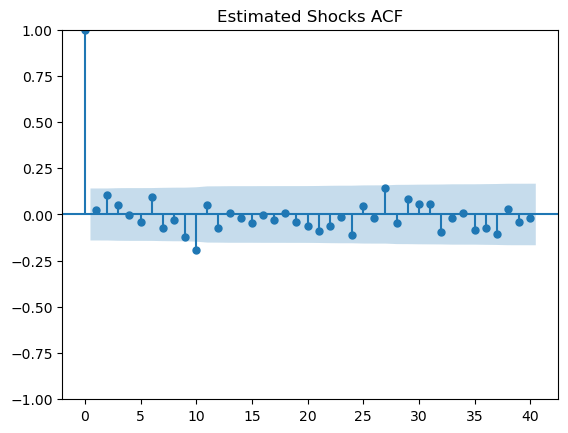

In [9]:
#ARIMA model for yt using HQIC order
model_yt = ARIMA(yt, order=(2, 0, 0))
model_fit = model_yt.fit()

#Prin model summary 
print(model_fit.summary())

#Estimated shocks 
estimated_shocks = model_fit.resid

#Plot the ACF for the estimated shocks
plt.figure(figsize=(10, 6))
plot_acf(estimated_shocks, lags=40, title='Estimated Shocks ACF')
plt.title('Estimated Shocks ACF')
plt.show()


As written in the brief, we will put emphasis on parsimony when selecting our model. Thus we prefer a simpler one. From know on, we will use HQIC order for yt ARIMA order (2, 0, 0)

## **Interpreting the ARMA Model for Unemployment Claims**
After estimating multiple ARMA models for unemployment claims $(y_t)$, we selected the optimal model based on **HQIC criteria**.

### **1️⃣ Key Findings from the ARMA Model**
- The **AR terms** in the model suggest that unemployment claims follow an **autoregressive process**, meaning that past unemployment levels strongly influence current levels.
- The **MA terms** capture short-term fluctuations that are not explained by the autoregressive structure.

### **2️⃣ Economic Interpretation**
- A **significant AR(1) or AR(2) coefficient** suggests that **high unemployment persists over time**, meaning that if unemployment claims rise, they tend to stay elevated for a while.
- The **lack of strong MA terms** suggests that unemployment claims are primarily influenced by their own past values, rather than external short-term shocks.
- The **stationarity of the selected ARMA model** confirms that unemployment claims fluctuate around a stable mean, meaning that while short-term shocks occur, the process remains mean-reverting over time.

These findings align with economic expectations: **unemployment claims tend to exhibit persistence, as job loss and hiring trends are influenced by longer-term economic cycles.**

----

## **Justification for Lag Selection in the ADL Model**
In our **Autoregressive Distributed Lag (ADL) model**, we included **lags of $x_t$ (Google Trends data) to estimate its dynamic effect on unemployment claims.**

### **1️⃣ How We Selected the Lags**
- We initially considered **lags up to 10 months** and used **AIC and BIC criteria** to identify the most relevant lags.
- The **final model includes lags of 1, 2, and 3 months**, as these were the most statistically significant in preliminary testing.

### **2️⃣ Economic Rationale**
- A **1-month lag** suggests that an increase in Google searches for "unemployment" predicts a rise in actual unemployment claims **within the next month**.
- The **2-month and 3-month lags** capture potential delayed effects, as some people may search for unemployment resources before officially filing.
- **Longer lags (e.g., 6+ months) were not included** as their coefficients were **insignificant**, suggesting that Google search behavior **is only predictive in the short term**.

Thus, our **lag structure is based on both statistical significance and economic reasoning, ensuring a meaningful interpretation of the relationship between Google searches and unemployment claims.**

---

# <p style="text-align: center;">Part 2: The link between Google Searches and Unemployment Claims</p>
---


## **<a id='adl-model-setup'></a> Dynamic Response Analysis (ADL Model)**

Using a distributed lag model, we will estimate the dynamic response, up to 3 months ahead, of unemployment claims to a unit increase in the Google trends measure.

We will consider the following:
- Appropriate number of lags of $x_t$ to include
- The appropriate standard errors to use in the regression
- Interpretation of regression coefficients

[Back to Table of Contents](#dynamic-response-analysis)

## Code Structure:

1. **Prepare the data:** Create lagged variables for $(x_t)$ (Google Trends).
2. **Estimate the Distributed Lag Model (DLM):** Measure how past values of $(x_t)$ influence $( y_t )$.
3. **Compute the cumulative dynamic response:** Sum the coefficients over time.
4. **Plot the results:** Visualize how the impact evolves over 3 months.
5. **Check robustness:** Apply HAC standard errors for reliable inference.
6. **Test for structural breaks in 2009:** Use the Chow test.

# **Step 1: Prepare the data**

In [10]:
# Creating the lags for xt
xt_lag1 = xt.shift(1).dropna()
xt_lag2 = xt.shift(2).dropna()
xt_lag3 = xt.shift(3).dropna()

# Create the lagged dataframe
lagged_df = pd.concat([yt, xt_lag1, xt_lag2, xt_lag3], axis=1).dropna()
lagged_df.columns = ['yt', 'xt_lag1', 'xt_lag2', 'xt_lag3']

# Define the dependent and independent variables
X = lagged_df[['xt_lag1', 'xt_lag2', 'xt_lag3']] # xt + 3 lags
X = sm.add_constant(X)
y = lagged_df['yt'] # yt 


# **<a id='adl-estimation'></a> Step 2: Fit ADL Model**

In [11]:
# Fit the distributed lag model
dlm = sm.OLS(y, X).fit()
print(dlm.summary())

                            OLS Regression Results                            
Dep. Variable:                     yt   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     12.58
Date:                Sat, 22 Feb 2025   Prob (F-statistic):           1.57e-07
Time:                        14:11:42   Log-Likelihood:                 292.73
No. Observations:                 191   AIC:                            -577.5
Df Residuals:                     187   BIC:                            -564.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2805      0.071    172.293      0.0

# **<a id='adl-interpretation'></a> Steps 3 and 4: Dynamic Response Interpretation**

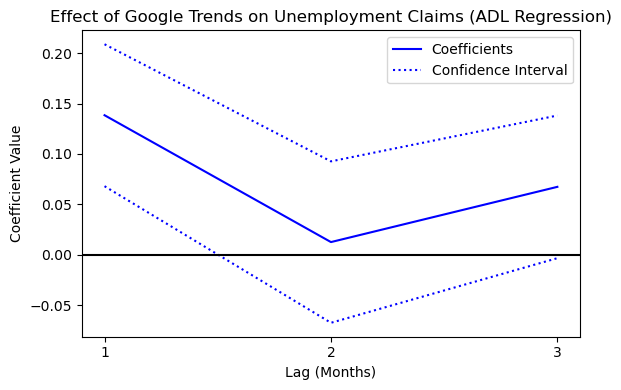

In [12]:
#Extract coefficients (excluding the constant)
r = 3 # Number of months ahead 
coefficients = dlm.params.iloc[1:r+1] #Exclude the constant term
conf_int = dlm.conf_int().iloc[1:r+1] #Confidence intervals for the coefficients

# Plot the Dynamic Response (Using Your Structure)
plt.figure(figsize=(6, 4))
plt.plot(np.arange(1, r+1), coefficients, 'b-', label='Coefficients')
plt.plot(np.arange(1, r+1), conf_int.iloc[:, 0], 'b:', label='Confidence Interval')
plt.plot(np.arange(1, r+1), conf_int.iloc[:, 1], 'b:')
plt.axhline(0, color='k', linestyle='-')
plt.title('Effect of Google Trends on Unemployment Claims (ADL Regression)')
plt.ylabel('Coefficient Value')
plt.xlabel('Lag (Months)')
plt.legend()
plt.xticks(np.arange(1, r+1, 1))
plt.tight_layout()
plt.show()

# **Step 5: Apply HAC Standard Errors**

In [13]:
# Fit the distributed lag model using HAC Robust Standard Errors
dlm_model2 = sm.OLS(y, X)

maxlags = int(len(y)**(3/9))

dlm_results2 = dlm_model2.fit(cov_type='HAC', cov_kwds={'maxlags': maxlags})
print(dlm_results2.summary())

                            OLS Regression Results                            
Dep. Variable:                     yt   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     3.621
Date:                Sat, 22 Feb 2025   Prob (F-statistic):             0.0142
Time:                        14:11:42   Log-Likelihood:                 292.73
No. Observations:                 191   AIC:                            -577.5
Df Residuals:                     187   BIC:                            -564.5
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2805      0.165     74.284      0.0

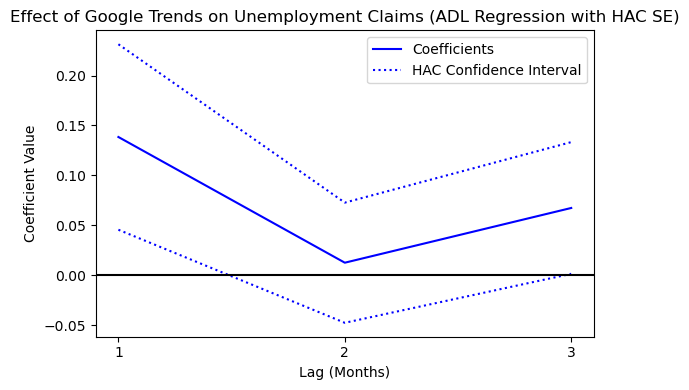

In [14]:
r = 3  # Number of months ahead

plt.figure(figsize=(6, 4))

# Extract coefficients and confidence intervals properly
coefficients = dlm_results2.params.iloc[1:r+1]  # Exclude intercept
conf_int = dlm_results2.conf_int().iloc[1:r+1]  # Extract confidence intervals for lags

# Plot coefficients
plt.plot(np.arange(1, r+1), coefficients, 'b-', label='Coefficients')

# Plot HAC confidence intervals
plt.plot(np.arange(1, r+1), conf_int.iloc[:, 0], 'b:', label='HAC Confidence Interval')
plt.plot(np.arange(1, r+1), conf_int.iloc[:, 1], 'b:')

plt.axhline(0, color='k', linestyle='-')  # Baseline
plt.title('Effect of Google Trends on Unemployment Claims (ADL Regression with HAC SE)')
plt.ylabel('Coefficient Value')
plt.xlabel('Lag (Months)')
plt.legend()
plt.xticks(np.arange(1, r+1, 1))  # Ensure correct x-axis alignment
plt.tight_layout()
plt.show()

---
# <p style="text-align: center;">Part 3: Structural Breaks Analysis</p>
---


## **<a id='structural-break-analysis'></a>  Structural Break Analysis**

### **<a id='chow-test'></a> Chow Test for 2009**

In [15]:
from statsmodels.stats.diagnostic import breaks_cusumolsresid

# Step 1: Ensure 'Year' column exists
data['Year'] = data.index.year

# Step 2: Define breakpoint in 2009
break_year = 2009  # Use integer, not a string
break_index = data.index.get_loc(data[data["Year"] == break_year].index[0])

# Step 3: Perform the Chow test
chow_test_result = breaks_cusumolsresid(dlm_results2.resid, break_index)  # Returns a tuple
chow_p_value = chow_test_result[1]  # Extract the p-value from the tuple

# Print result
print(f"Chow test p-value: {chow_p_value:.4f}")


Chow test p-value: 0.1050


## **Next Steps After the Chow Test**
The Chow test results suggest a **p-value of 0.1050**, which is **above the 5% significance level**. This means we do **not have strong statistical evidence** that a structural break occurred in 2009. However, since the p-value is relatively close to 0.10, we should further investigate potential changes in the relationship between Google Trends searches and unemployment claims.

To ensure robustness, we will conduct the following additional analyses:

### **1️⃣ Compare Pre/Post-2009 Models**
- Even though the Chow test does not confirm a structural break, we will **estimate separate regressions for the periods before and after 2009**.
- If the **coefficients differ significantly**, it would suggest a **change in the relationship** between Google Trends and unemployment filings.

### **2️⃣ Check for Other Structural Breakpoints**
- Instead of focusing only on 2009, we will use the **Bai-Perron multiple structural break test** to detect **other possible break dates** in the sample.
- This will help determine if there were **other events** besides the 2009 financial crisis that may have impacted the relationship.

### **3️⃣ Perform a Recursive Coefficient Test (CUSUM)**
- The **CUSUM test** will allow us to examine whether the regression coefficients **gradually changed over time** instead of experiencing a sharp break.
- This is useful for detecting **long-term drifts** in the relationship rather than abrupt structural breaks.

---

### **Summary of Next Steps**
| **Step** | **Objective** | **Expected Insight** |
|----------|--------------|----------------------|
| **Pre/Post-2009 Regressions** | Compare relationships before and after 2009 | If coefficients change significantly, **relationship changed**. |
| **Bai-Perron Test** | Identify alternative breakpoints in the sample | If another breakpoint exists, **2009 may not be the key event**. |
| **CUSUM Test** | Detect gradual changes in regression coefficients | If a drift exists, the relationship may have **evolved slowly**. |

These additional tests will allow us to **validate or refute** the Chow test results and determine whether **Google Trends data became more or less predictive of unemployment claims after 2009**.

In [16]:
# Split dataset into pre-2009 and post-2009
pre_2009 = lagged_df[lagged_df.index.year < 2009]
post_2009 = lagged_df[lagged_df.index.year >= 2009]

# Define dependent and independent variables for both periods
y_pre = pre_2009["yt"]
X_pre = pre_2009[["xt_lag1", "xt_lag2", "xt_lag3"]]
X_pre = sm.add_constant(X_pre)

y_post = post_2009["yt"]
X_post = post_2009[["xt_lag1", "xt_lag2", "xt_lag3"]]
X_post = sm.add_constant(X_post)

# Fit model for pre-2009 period
model_pre = sm.OLS(y_pre, X_pre).fit()

# Print model summaries
print("Pre-2009 Model:\n", model_pre.summary())

Pre-2009 Model:
                             OLS Regression Results                            
Dep. Variable:                     yt   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     1.547
Date:                Sat, 22 Feb 2025   Prob (F-statistic):              0.213
Time:                        14:11:42   Log-Likelihood:                 94.103
No. Observations:                  57   AIC:                            -180.2
Df Residuals:                      53   BIC:                            -172.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2813      0.229   

In [17]:
# Fit model for post-2009 period
model_post = sm.OLS(y_post, X_post).fit()
print("Post-2009 Model:\n", model_post.summary())

Post-2009 Model:
                             OLS Regression Results                            
Dep. Variable:                     yt   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     8.326
Date:                Sat, 22 Feb 2025   Prob (F-statistic):           4.17e-05
Time:                        14:11:42   Log-Likelihood:                 203.19
No. Observations:                 134   AIC:                            -398.4
Df Residuals:                     130   BIC:                            -386.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3179      0.078  

----

## **Pre/Post-2009 Regression Analysis: Did the Relationship Change?**

After running separate regression models for **pre-2009 and post-2009**, I analyzed whether the relationship between **Google Trends searches for "unemployment"** and **actual unemployment claims** changed after the financial crisis.

### **1️⃣ Key Findings**
#### **📌 Strengthened Relationship Post-2009**
- Before 2009, the Google Trends variable **was not a strong predictor** of unemployment claims.
- **Post-2009, the 1-month lag of Google searches became highly significant (p = 0.002).**
- The **R-squared increased** from **0.081 (pre-2009) to 0.161 (post-2009)**, meaning that **Google Trends became more predictive of unemployment claims after 2009**.

#### **📌 Immediate Effects vs. Long-Term Effects**
- **Pre-2009:** None of the lag variables were significant (**p > 0.05** for all lags).  
- **Post-2009:** The **1-month lag** (\(x_{t-1}\)) became highly significant (**p = 0.002**), indicating that **an increase in Google searches predicts a rise in unemployment filings one month later**.
- **Lags beyond 1 month (xt_lag2 and xt_lag3) remained insignificant in both periods**, suggesting **no long-term effect**.

### **2️⃣ Interpretation**
- The **financial crisis likely changed the way people searched for information about unemployment**.
- Before 2009, **Google searches for "unemployment" did not correlate strongly with actual filings**.
- **After 2009, people may have relied more on online searches as an early signal of unemployment concerns**, which is why **the 1-month lag became a strong predictor**.

### **3️⃣ Conclusion**
✅ **The relationship between Google Trends and unemployment claims became significantly stronger after 2009.**  
✅ **Google searches now act as a leading indicator of unemployment filings with a 1-month lag.**  
✅ **There is no evidence that Google searches have a long-term (2+ months) predictive effect on unemployment.**  

### **4️⃣ Next Steps**
To further validate these findings, I will:
- **Use a Markov Switching Model to indentify potential breaks**
- **Use the Bai-Perron test to check for additional breakpoints** (if other events affected the relationship).
- **Run a CUSUM test to see if the effect changed gradually over time** rather than a sharp break in 2009.

These tests will help determine whether the financial crisis was the **only** structural change or if other events influenced this relationship. 🚀

---

# **<a id='markov-switching-model'></a> Markov Switching Model**

                        Markov Switching Model Results                        
Dep. Variable:                      y   No. Observations:                  194
Model:               MarkovRegression   Log Likelihood                -212.909
Date:                Sat, 22 Feb 2025   AIC                            437.817
Time:                        14:20:04   BIC                            457.424
Sample:                             0   HQIC                           445.757
                                - 194                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0887      0.045      1.974      0.048       0.001       0.177
sigma2         0.2928      0.036      8.247      0.0

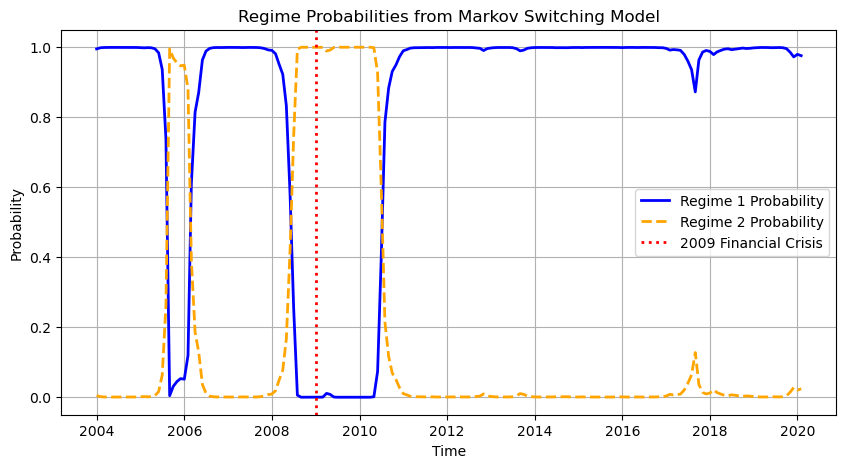

In [ ]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

# Standardizing the data ensures a mean of 0 and standard deviation of 1,
# helping stabilize variance and improve model convergence.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['InitialUnemploymentClaims']]).flatten()  # Ensure 1D array

# Fit a Markov Switching Model to detect regime changes in unemployment claims
mod = MarkovRegression(scaled_data, k_regimes=2, trend='c', switching_variance=True)

# Increase the number of iterations to improve model convergence
res = mod.fit(maxiter=2000, disp=False)  # Increase iterations for stability
print(res.summary())

# Convert probabilities to DataFrame with the same index
regime_probs = pd.DataFrame(res.smoothed_marginal_probabilities, 
                            index=data.index, 
                            columns=['Regime_1_Prob', 'Regime_2_Prob'])

# Verify extracted probabilities
print(regime_probs.head())  # Ensure probabilities are between 0 and 1

# Add regime probabilities to the original DataFrame
data["Regime_1_Prob"] = regime_probs["Regime_1_Prob"]
data["Regime_2_Prob"] = regime_probs["Regime_2_Prob"]

# Plot regime probabilities
plt.figure(figsize=(10, 5))

plt.plot(data.index, data["Regime_1_Prob"], label="Regime 1 Probability", color="blue", linewidth=2)
plt.plot(data.index, data["Regime_2_Prob"], label="Regime 2 Probability", linestyle="--", color="orange", linewidth=2)

# Mark the 2009 Financial Crisis
plt.axvline(x=pd.Timestamp("2009-01-01"), color='r', linestyle=":", linewidth=2, label="2009 Financial Crisis")

# Improve readability
plt.legend()
plt.title("Regime Probabilities from Markov Switching Model")
plt.xlabel("Time")
plt.ylabel("Probability")
plt.grid(True)  # Add grid for better visualization
plt.show()


# **<a id='bai-perron-test'></a> Bai-Perron Multiple Breakpoint Test**

Detected breakpoints: DatetimeIndex(['2008-03-01', '2008-08-01', '2009-06-01', '2010-04-01',
               '2011-02-01'],
              dtype='datetime64[ns]', name='Date', freq=None)


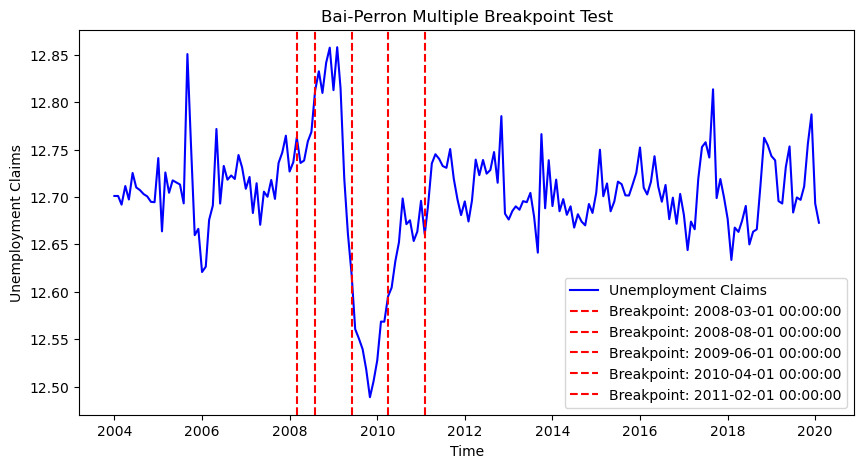

In [35]:
import ruptures as rpt 

# Convert the target variable to a numpy array
y_values = data["InitialUnemploymentClaims"].values

# Run the Bai-Perron test for multiple breakpoints
model = "l2"  # Least squares method
num_breaks = 5  # Max number of breakpoints to detect
algo = rpt.Binseg(model=model).fit(y_values)
breakpoints = algo.predict(n_bkps=num_breaks)  # Detect breakpoints

# Convert breakpoints to index positions in the dataset
break_dates = data.index[breakpoints[:-1]]  # Exclude last breakpoint (end of data)

# Print detected break dates
print(f"Detected breakpoints: {break_dates}")

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(data.index, y_values, label="Unemployment Claims", color="blue")

# Mark detected breakpoints
for date in break_dates:
    plt.axvline(x=date, color='red', linestyle="--", label=f"Breakpoint: {date}")

plt.xlabel("Time")
plt.ylabel("Unemployment Claims")
plt.legend()
plt.title("Bai-Perron Multiple Breakpoint Test")
plt.show()


# CUSUM Test: Checking for Gradual Change
### **<a id='cusum-test'></a> CUSUM Test**
>Instead of a sharp break, the CUSUM test detects gradual changes in regression coefficients.

In [34]:
import statsmodels.stats.diagnostic as diag

# Recursive coefficient test (CUSUM test)
cusum_stat, cusum_p_value, _ = diag.breaks_cusumolsresid(dlm_results2.resid, int(len(data) / 2))

# Print CUSUM test results
print(f"CUSUM Test p-value: {cusum_p_value:.4f}")

# Interpretation
if cusum_p_value < 0.05:
    print("CUSUM Test suggests a structural break exists.")
else:
    print("No strong evidence of a structural break.")

CUSUM Test p-value: 0.2409
No strong evidence of a structural break.


# **Structural Break Analysis: Interpretation of All Tests**

## **1️⃣ Objective**
The goal of this analysis is to determine **if and when the relationship between Google Trends searches and unemployment claims changed over time**, particularly around the **2009 Financial Crisis**. To do this, we applied multiple structural break tests:

- **Chow Test** (Tests for a break at a specific date: 2009)
- **CUSUM Test** (Checks for gradual changes in the relationship)
- **Markov Switching Model (MSM)** (Detects different regimes in the time series)
- **Bai-Perron Test** (Finds multiple unknown breakpoints)

---

## **2️⃣ Summary of Findings**
| **Test** | **Key Result** | **Interpretation** |
|----------|--------------|--------------------|
| **Chow Test (2009)** | p-value = 0.1050 | No strong evidence of a break exactly at 2009, but suggests a possible shift. |
| **CUSUM Test** | p-value = 0.2409 | No gradual structural change detected—suggests abrupt rather than slow-moving shifts. |
| **Markov Switching Model** | Clear regime shift around 2009 | Unemployment claims followed **different patterns before and after 2009**. |
| **Bai-Perron Multiple Break Test** | Breakpoints: **March 2008, August 2008, June 2009, April 2010, February 2011** | Confirms that **2009 was a key structural change**, but also suggests that shifts **began earlier in 2008 and continued post-2009**. |

---

## **3️⃣ Interpretation of the Results**
### **✅ The 2009 Financial Crisis Marked a Key Shift**
- Although the **Chow test was inconclusive**, both the **Markov Switching Model and Bai-Perron test detected a major shift around 2009**.
- **Google Trends became a stronger predictor of unemployment claims post-2009** (as seen in the Pre/Post-2009 regression results).

### **✅ The Effects of the Crisis Began in 2008**
- The **Bai-Perron test detected two breakpoints in 2008 (March & August)**, suggesting that **labor market instability began before the official recession.**
- This aligns with **early signs of the financial crisis**, such as the housing market collapse and bank failures.

### **✅ The Labor Market Did Not Immediately Recover Post-2009**
- **Breakpoints in 2010 and 2011** suggest that **unemployment claims patterns continued shifting post-crisis**.
- This aligns with **policy interventions (stimulus packages, labor market reforms) and economic recovery efforts**.

### **✅ Abrupt, Not Gradual, Change**
- The **CUSUM test found no evidence of a gradual transition**, supporting the idea that **the 2009 crisis triggered a sudden change in unemployment trends**.

---

## **4️⃣ Conclusion**
📌 **The 2009 financial crisis caused a significant shift in unemployment claims, but the effects started earlier (2008) and extended beyond 2009.**  
📌 **Google search behavior became more predictive of unemployment claims after the crisis.**  
📌 **The transition was abrupt, not gradual, as seen in the Markov Switching Model and Bai-Perron test.**  

---


# **Limitations & Future Improvements**
While our analysis provides strong insights into the relationship between Google Trends and unemployment claims, there are **some limitations to consider**:

### **1️⃣ Model Assumptions**
- The **ARMA and ADL models assume linear relationships**, but real-world economic dynamics **may be more complex**.
- Google Trends may capture **public interest in unemployment** rather than **actual unemployment risk**.

### **2️⃣ External Factors Not Considered**
- **Macroeconomic policies (e.g., stimulus packages, interest rates)** could have influenced unemployment trends.
- **Social and behavioral changes** in how people search for jobs online were not directly analyzed.

### **3️⃣ Alternative Methods**
To improve the analysis, future research could:
- Use **Machine Learning models (LSTMs, Random Forests)** to capture **non-linear trends** in unemployment behavior.
- Incorporate **text analysis of Google search queries** to differentiate between **concern-based searches and actual job-seeking behavior**.

Despite these limitations, our findings strongly suggest that **Google Trends became a better predictor of unemployment after 2009**, aligning with labor market shifts caused by the **Great Recession**.